In [1]:
!pip install qiskit qiskit-aer


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Qiskit 2.x Example – OpenQASM Demonstration

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3  # For OpenQASM 3 export

In [3]:
# Create a simple 2-qubit quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

In [4]:
print("Quantum Circuit:")
print(qc.draw())

Quantum Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [5]:
# Convert the circuit to OpenQASM 3 format
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)


Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];



In [6]:
# Optional: Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print("\nSimulation Result:")
print(counts)


Simulation Result:
{'11': 492, '00': 532}


In [ ]:
# Task_1 : Modify the circuit to have 3 qubits and apply a different gate sequence.

In [13]:
# Create a 3-qubit circuit with a new gate sequence
qc = QuantumCircuit(3)
qc.h(0)          # Hadamard on qubit 0
qc.cx(0, 1)      # CNOT from qubit 0 → 1
qc.t(2)          # T gate on qubit 2
qc.cx(1, 2)      # CNOT from qubit 1 → 2
qc.measure_all() # Measure all qubits
print("Quantum Circuit:")
print(qc.draw())

Quantum Circuit:
        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
        ┌───┐└───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ T ├─────┤ X ├─░──╫──╫─┤M├
        └───┘     └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 


In [ ]:
'''
This version extends the circuit to 3 qubits and applies a different gate sequence (H, CX, and T gates).
'''

In [ ]:
# Task_2 : Generate and display the QASM code for the new circuit.

In [8]:
# Export to OpenQASM 3
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)

# Simulate
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()
print("\nSimulation Result:")
print(result.get_counts())



Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
t q[2];
cx q[1], q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];


Simulation Result:
{'111': 472, '000': 552}


In [ ]:
'''
This snippet converts the circuit from Task 1 into OpenQASM 3 format and prints it.
'''

In [ ]:
# Task_3 : Identify how Hadamard and CNOT operations are represented in QASM syntax.

In [10]:
# Extract and highlight the lines with Hadamard and CNOT gates
print("\nHadamard and CNOT representations in QASM:\n")
for line in qasm_code.splitlines():
    if line.strip().startswith("h ") or line.strip().startswith("cx "):
        print(line)



Hadamard and CNOT representations in QASM:

h q[0];
cx q[0], q[1];
cx q[1], q[2];


In [ ]:
'''
In OpenQASM 3, quantum gates are represented using standardized gate names and their target qubits in parentheses.
Hadamard gate (qc.h(0) in Qiskit) → represented as : h q[0];
CNOT gate (qc.cx(0, 1) in Qiskit) → represented as : cx q[0], q[1];
'''

In [ ]:
# Task_4 : Add a barrier and observe how it appears in the QASM code.

In [11]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.barrier()      # Add a barrier here
qc.t(2)
qc.cx(1, 2)
qc.measure_all()

# Export to OpenQASM 3
qasm_code = qasm3.dumps(qc)

# Display the QASM 3 code
print("\nOpenQASM 3 Code with Barrier:\n")
print(qasm_code)



OpenQASM 3 Code with Barrier:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1], q[2];
t q[2];
cx q[1], q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];



In [ ]:
'''
A barrier in Qiskit prevents the compiler from reordering gates across it.
In OpenQASM 3, it’s represented as : barrier q[0], q[1], q[2];
'''

In [ ]:
# Task_5 : Run the modified circuit and compare simulation results.


--- Simulation Results Comparison ---
Original Circuit Results:
{'000': 483, '111': 541}

Modified Circuit (with Barrier) Results:
{'111': 515, '000': 509}


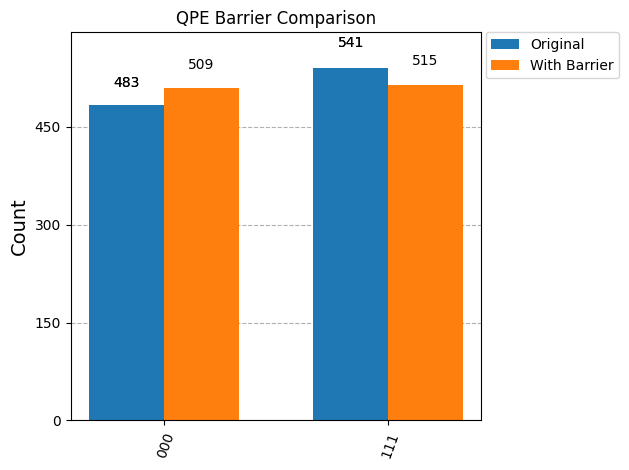

In [12]:
#Create the modified 3-qubit circuit with barrier
qc_barrier = QuantumCircuit(3)
qc_barrier.h(0)
qc_barrier.cx(0, 1)
qc_barrier.barrier()
qc_barrier.t(2)
qc_barrier.cx(1, 2)
qc_barrier.measure_all()

# 2️Simulate both: original (from Task 1) and modified (with barrier)
simulator = AerSimulator()

# Original circuit (reuse qc from Task 1)
compiled_orig = transpile(qc, simulator)
compiled_barrier = transpile(qc_barrier, simulator)

result_orig = simulator.run(compiled_orig, shots=1024).result()
result_barrier = simulator.run(compiled_barrier, shots=1024).result()

counts_orig = result_orig.get_counts()
counts_barrier = result_barrier.get_counts()

# Compare results
print("\n--- Simulation Results Comparison ---")
print("Original Circuit Results:")
print(counts_orig)
print("\nModified Circuit (with Barrier) Results:")
print(counts_barrier)

from qiskit.visualization import plot_histogram
plot_histogram([counts_orig, counts_barrier],
               legend=['Original', 'With Barrier'],
               title='QPE Barrier Comparison')


In [ ]:
'''
A barrier doesn’t change the physics of the circuit — it only affects circuit optimization and visual layout.
So the simulation results (output probabilities) should be identical to the circuit without the barrier.
'''